In [1]:
# Import Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import date
from datetime import timedelta
from functools import reduce

In [2]:
#Load data
confirmed  = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths     = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


In [3]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [4]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [5]:
recoveries.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# The latest situation: total cases of the most recent day
def latest_situation(country):
  df = pd.DataFrame(confirmed['Country/Region'])
  df['Latest_confirmed_cases'] = confirmed.iloc[: , -1]
  df['Latest_death_cases'] = deaths.iloc[: , -1]
  df['Latest_recovery_cases'] = recoveries.iloc[: , -1]
  return df[df['Country/Region'] == country]

latest_situation('China')
selected_columns = [col for col in confirmed.columns if (col >= '1/22/20') and (col <= '10/31/20')] + ['Country/Region']
selected_columns

['1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '10/1/20',
 '10/2/20',
 '10/3/20',
 '10/10/20',
 '10/11/20',
 '10/12/20',
 '10/13/20',
 '10/14/20',
 '10/15/20',
 '10/16/20',
 '10/17/20',
 '10/18/20',
 '10/19/20',
 '10/20/20',
 '10/21/20',
 '10/22/20',
 '10/23/20',
 '10/24/20',
 '10/25/20',
 '10/26/20',
 '10/27/20',
 '10/28/20',
 '10/29/20',
 '10/30/20',
 '10/31/20',
 '1/3/21',
 '1/4/21',
 '1/5/21',
 '1/6/21',
 '1/7/21',
 '1/8/21',
 '1/9/21',
 '1/22/21',
 '1/23/21',
 '1/24/21',
 '1/25/21',
 '1/26/21',
 '1/27/21',
 '1/28/21',
 '1/29/21',
 '1/30/21',
 '1/31/21',
 '10/1/21',
 '10/2/21',
 '10/3/21',
 '10/10/21',
 '10/11/21',
 '10/12/21',
 '10/13/21',
 '10/14/21',
 '10/15/21',
 '10/16/21',
 '10/17/21',
 '10/18/21',
 '10/19/21',
 '10/20/21',
 '10/21/21',
 '10/22/21',
 '10/23/21',
 '10/24/21',
 '10/25/21',
 '10/26/21',
 '10/27/21',
 '10/28/21',
 '10/29/21',
 '10/30/21',
 '1/3/22',
 '1/4/22',
 '1/5/22',
 '1/6/22',
 '1/7/22

In [18]:
# Extract columns until 31 Oct 2020
Confirmed_Oct31 = pd.DataFrame(confirmed.loc[: , :'10/31/20'])
Confirmed_Oct31.drop(['Lat', 'Long'], axis=1, inplace=True)
Confirmed_Oct31['Total confirmed cases'] = pd.DataFrame(Confirmed_Oct31.sum(axis=1, numeric_only=True))

Deaths_Oct31 = pd.DataFrame(deaths.loc[: , :'10/31/20'])
Deaths_Oct31.drop(['Lat', 'Long'], axis=1, inplace=True)
Deaths_Oct31['Total deaths'] = pd.DataFrame(Deaths_Oct31.sum(axis=1, numeric_only=True))

Recoveries_Oct31 = pd.DataFrame(recoveries.loc[: , :'10/31/20'])
Recoveries_Oct31.drop(['Lat', 'Long'], axis=1, inplace=True)
Recoveries_Oct31['Total recoveries'] = pd.DataFrame(Recoveries_Oct31.sum(axis=1, numeric_only=True))


In [21]:
#Top 5 countries by the total number of confirmed cases
Confirmed_Oct31.sort_values(by=['Total confirmed cases'], inplace=True, ascending=False)
Sort = Confirmed_Oct31.head(5)

#New data frame
data_Confirmed = Sort[['Country/Region', 'Total confirmed cases']]

data_Deaths = Deaths_Oct31[Deaths_Oct31['Country/Region'].isin(data_Confirmed['Country/Region'].tolist())][['Country/Region', 'Total deaths']]
data_Recoveries = Recoveries_Oct31[Recoveries_Oct31['Country/Region'].isin(data_Confirmed['Country/Region'].tolist())][['Country/Region', 'Total recoveries']]
data = pd.merge(data_Confirmed, data_Deaths, on = "Country/Region", how = "inner")
data = pd.merge(data, data_Recoveries, on = "Country/Region", how = "inner")
data


,Country/Region,Total confirmed cases,Total deaths,Total recoveries
0,US,860734225,29682611,293821115
1,India,510439608,8793172,410327005
2,Brazil,496868376,16411385,400594306
3,Russia,152076173,2462149,109707442
4,Spain,87517605,5990345,29529679


Plot: Cumulative cases until Oct 31 2020

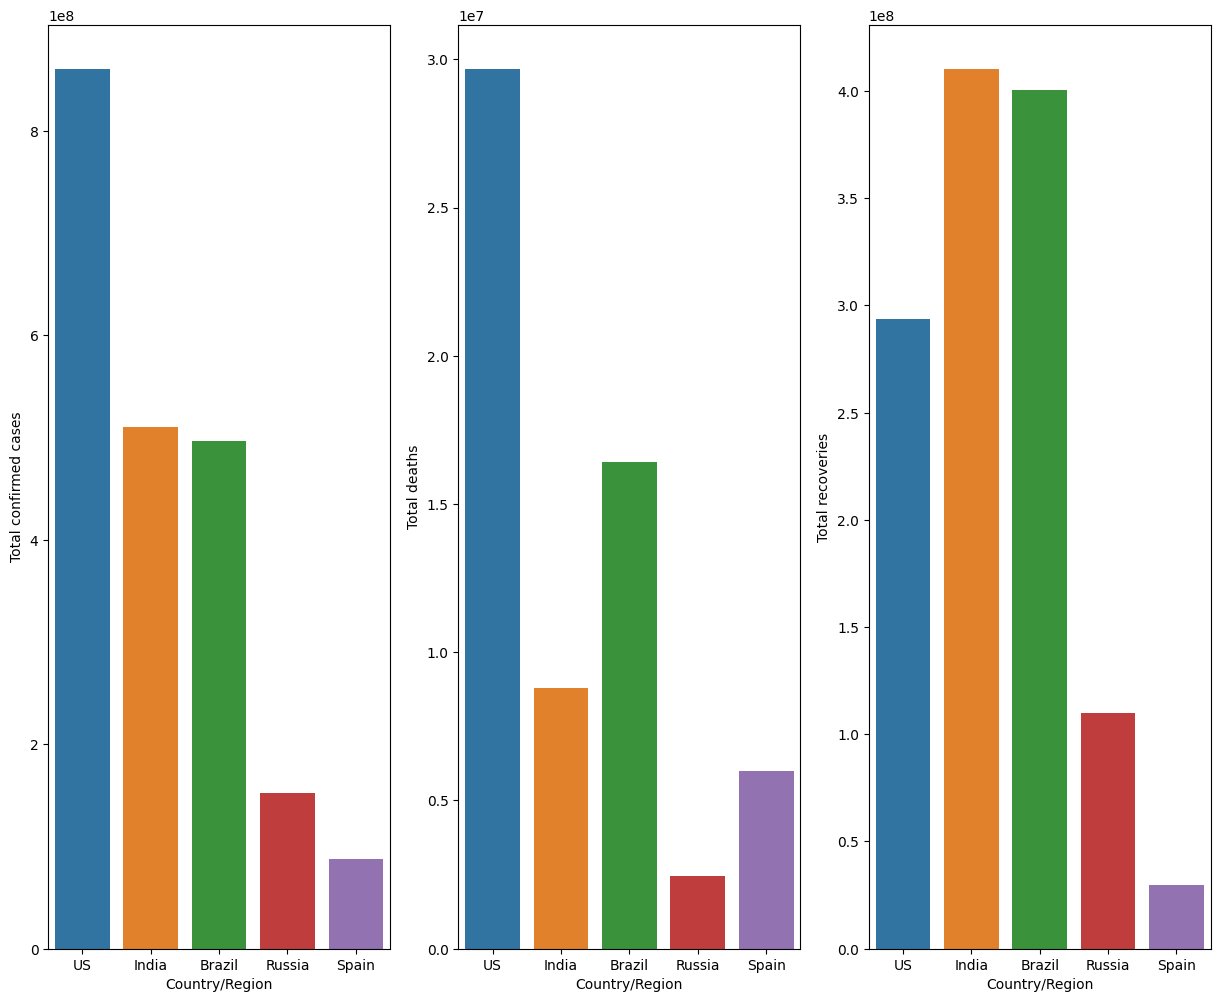

In [22]:
plt.figure(figsize = (15, 12))

#Total confirmed cases
plt.subplot(131)
sns.barplot(data = data, x = 'Country/Region', y = 'Total confirmed cases')

#Total deaths
plt.subplot(132)
sns.barplot(data = data, x = 'Country/Region', y = 'Total deaths')

#Total recoveries
plt.subplot(133)
sns.barplot(data = data, x = 'Country/Region', y = 'Total recoveries')

plt.show()


In [24]:
def split_by_month(data):
  Jan = pd.DataFrame(data.loc[: ,'1/22/20' :'1/31/20'])
  Jan['Jan'] = pd.DataFrame(Jan.sum(axis=1))
  Jan['Country/Region'] = data['Country/Region']
  Jan = Jan[Jan['Country/Region'].isin(data_Confirmed['Country/Region'].tolist())]
  Jan = Jan[['Country/Region', 'Jan']]

  Feb = pd.DataFrame(data.loc[: ,'2/1/20' :'2/29/20'])
  Feb['Feb'] = pd.DataFrame(Feb.sum(axis=1))
  Feb['Country/Region'] = data['Country/Region']
  Feb = Feb[Feb['Country/Region'].isin(data_Confirmed['Country/Region'].tolist())]
  Feb = Feb[['Country/Region', 'Feb']]

  Mar = pd.DataFrame(data.loc[: ,'3/1/20' :'3/31/20'])
  Mar['Mar'] = pd.DataFrame(Mar.sum(axis=1))
  Mar['Country/Region'] = data['Country/Region']
  Mar = Mar[Mar['Country/Region'].isin(data_Confirmed['Country/Region'].tolist())]
  Mar = Mar[['Country/Region', 'Mar']]

  Apr = pd.DataFrame(data.loc[: ,'4/1/20' :'4/30/20'])
  Apr['Apr'] = pd.DataFrame(Apr.sum(axis=1))
  Apr['Country/Region'] = data['Country/Region']
  Apr = Apr[Apr['Country/Region'].isin(data_Confirmed['Country/Region'].tolist())]
  Apr = Apr[['Country/Region', 'Apr']]

  May = pd.DataFrame(data.loc[: ,'5/1/20' :'5/31/20'])
  May['May'] = pd.DataFrame(May.sum(axis=1))
  May['Country/Region'] = data['Country/Region']
  May = May[May['Country/Region'].isin(data_Confirmed['Country/Region'].tolist())]
  May = May[['Country/Region', 'May']]

  Jun = pd.DataFrame(data.loc[: ,'6/1/20' :'6/30/20'])
  Jun['Jun'] = pd.DataFrame(Jun.sum(axis=1))
  Jun['Country/Region'] = confirmed['Country/Region']
  Jun = Jun[Jun['Country/Region'].isin(data_Confirmed['Country/Region'].tolist())]
  Jun = Jun[['Country/Region', 'Jun']]

  Jul = pd.DataFrame(data.loc[: ,'7/1/20' :'7/31/20'])
  Jul['Jul'] = pd.DataFrame(Jul.sum(axis=1))
  Jul['Country/Region'] = data['Country/Region']
  Jul = Jul[Jul['Country/Region'].isin(data_Confirmed['Country/Region'].tolist())]
  Jul = Jul[['Country/Region', 'Jul']]

  Aug = pd.DataFrame(data.loc[: ,'8/1/20' :'8/31/20'])
  Aug['Aug'] = pd.DataFrame(Aug.sum(axis=1))
  Aug['Country/Region'] = data['Country/Region']
  Aug = Aug[Aug['Country/Region'].isin(data_Confirmed['Country/Region'].tolist())]
  Aug = Aug[['Country/Region', 'Aug']]

  Sep = pd.DataFrame(data.loc[: ,'9/1/20' :'9/30/20'])
  Sep['Sep'] = pd.DataFrame(Sep.sum(axis=1))
  Sep['Country/Region'] = data['Country/Region']
  Sep = Sep[Sep['Country/Region'].isin(data_Confirmed['Country/Region'].tolist())]
  Sep = Sep[['Country/Region', 'Sep']]

  Oct = pd.DataFrame(data.loc[: ,'10/1/20' :'10/31/20'])
  Oct['Oct'] = pd.DataFrame(Oct.sum(axis=1))
  Oct['Country/Region'] = data['Country/Region']
  Oct = Oct[Oct['Country/Region'].isin(data_Confirmed['Country/Region'].tolist())]
  Oct = Oct[['Country/Region', 'Oct']]

  dfs = [Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct]

  dfs = reduce(lambda left, right: pd.merge(left, right, on=["Country/Region"], how="outer"), dfs)
  dfs = pd.melt(dfs, id_vars='Country/Region', value_vars= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'],
             var_name='Months', value_name = 'Cases')
  return dfs


In [25]:
Confirmed = split_by_month(confirmed)
Deaths = split_by_month(deaths)
Recoveries = split_by_month(recoveries)

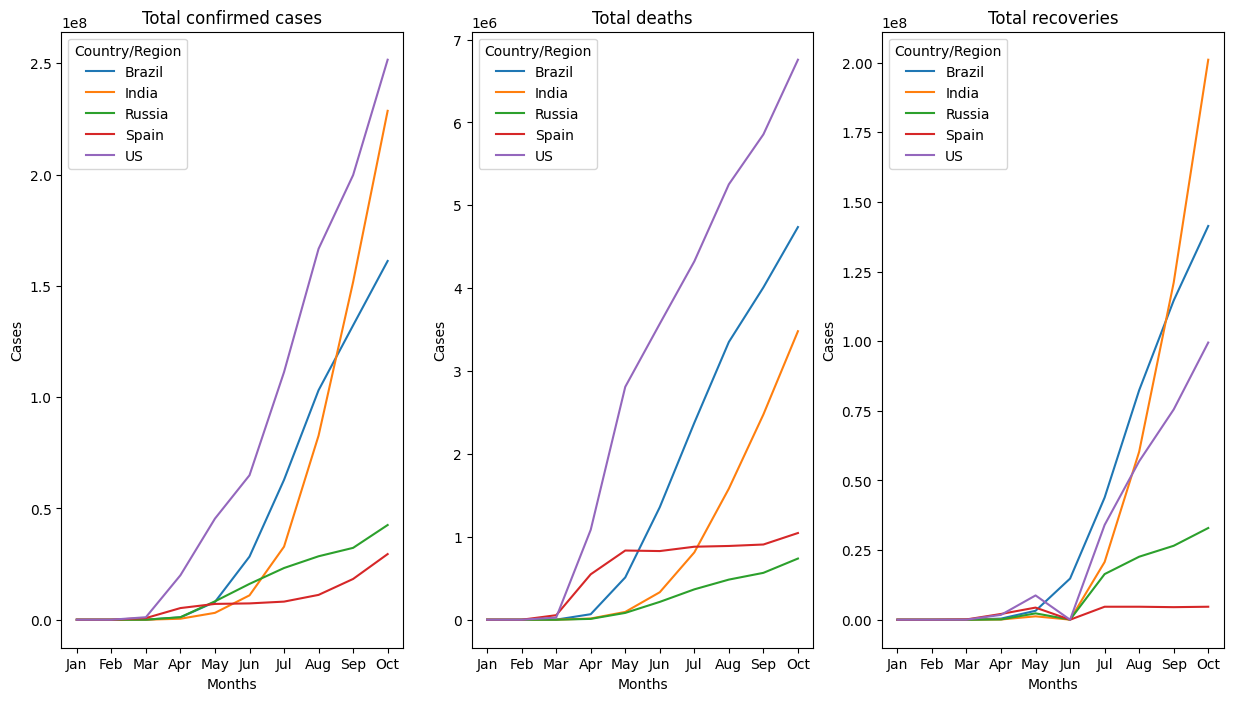

In [26]:
#Plot: Number of cases by Month
plt.figure(figsize = (15, 8))

plt.subplot(131)
sns.lineplot(data = Confirmed, x = 'Months', y = 'Cases', hue = 'Country/Region').set(title='Total confirmed cases')

plt.subplot(132)
sns.lineplot(data = Deaths, x = 'Months', y = 'Cases', hue = 'Country/Region').set(title='Total deaths')

plt.subplot(133)
sns.lineplot(data = Recoveries, x = 'Months', y = 'Cases', hue = 'Country/Region').set(title='Total recoveries')

plt.show()


[Text(0.5, 1.0, '% changes of Recovery Rate (%)')]

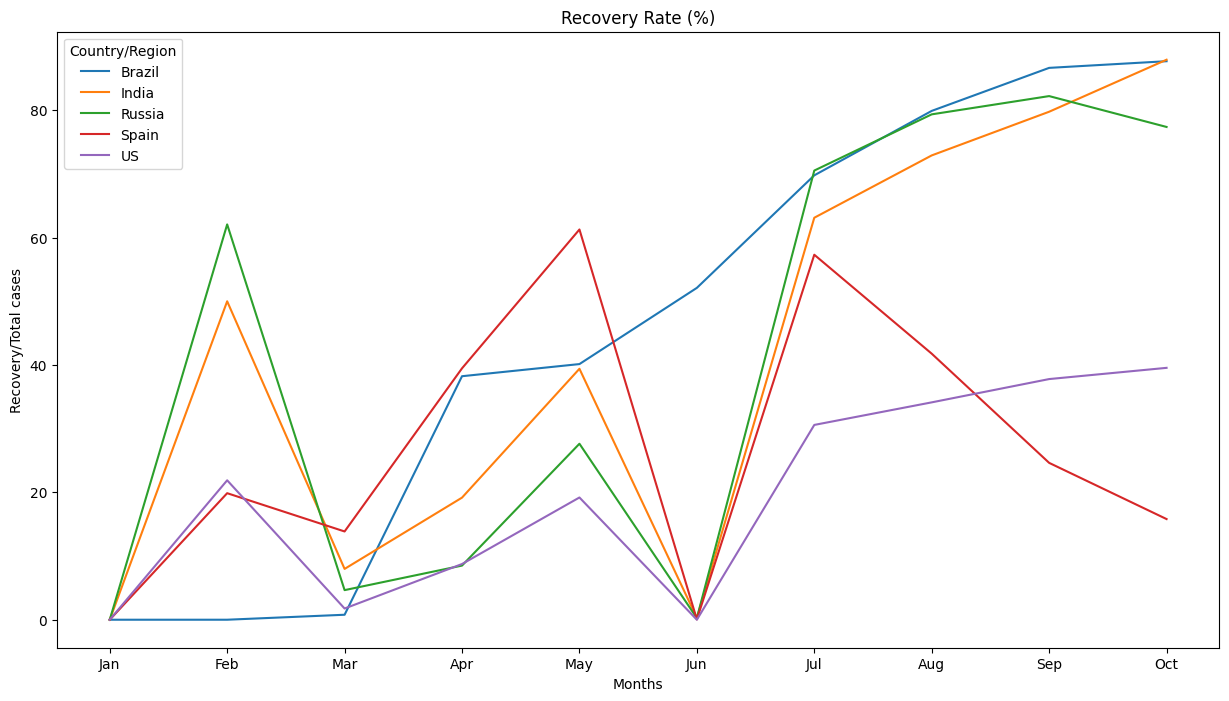

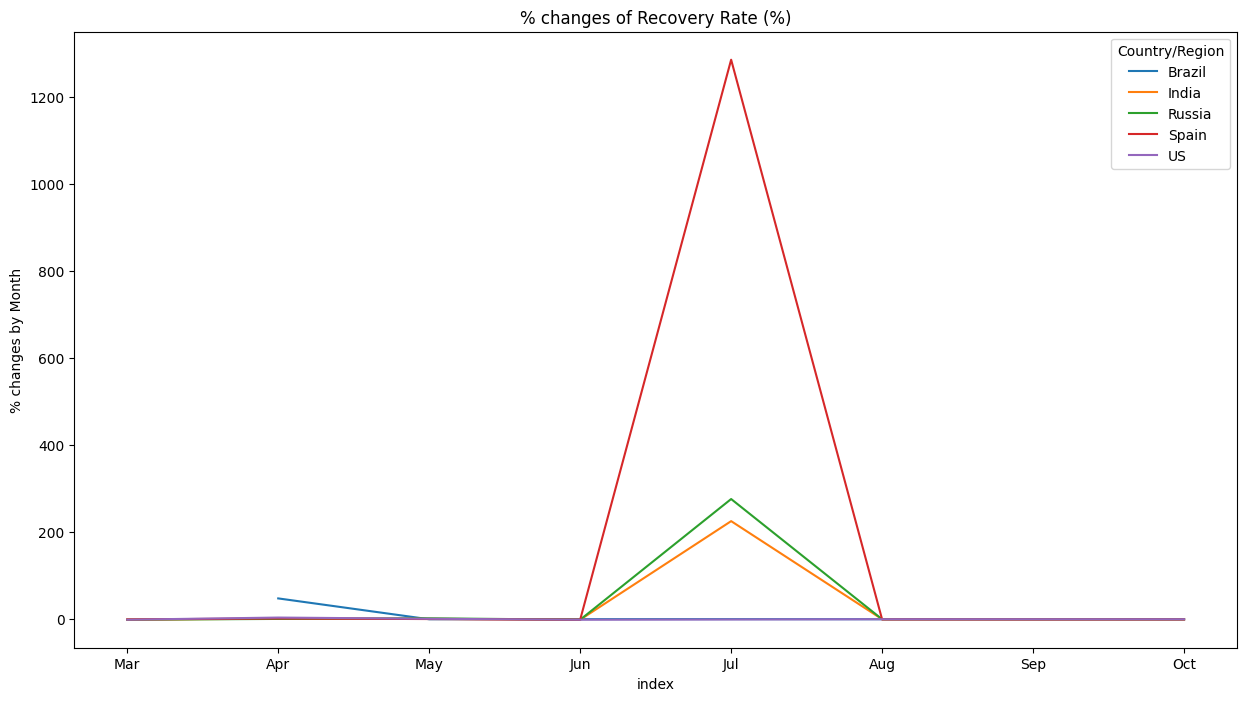

In [27]:
#Percentage change
new_data = (Confirmed
            .merge(Deaths, on=['Country/Region', 'Months'], how='left')
            .merge(Recoveries, on=['Country/Region', 'Months'], how='left'))

new_data.columns = ['Country/Region', 'Months', 'Confirmed cases', 'Deaths', 'Recoveries']
new_data['Recovery/Total cases'] = new_data['Recoveries']/new_data['Confirmed cases'] * 100
new_data['Recovery/Total cases'] = new_data['Recovery/Total cases'].fillna(0)

#Plot
plt.figure(figsize = (15, 8))
sns.lineplot(data = new_data, x = 'Months', y = 'Recovery/Total cases', hue = 'Country/Region').set(title='Recovery Rate (%)')

new_data2 = new_data.pivot(index = 'Months', columns = 'Country/Region', values = 'Recovery/Total cases')
new_data2.index = pd.Categorical(new_data2.index,
                          categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'],
                          ordered=True)
new_data2 = new_data2.sort_index()

#new_data3 contains data regarding percentage change by month
new_data3 = new_data2.pct_change().reset_index()

new_data3 = pd.melt(new_data3, id_vars='index', value_vars= ['Brazil', 'India', 'Russia', 'Spain', 'US'] ,
             var_name='Country/Region', value_name = '% changes by Month')
#Plot
plt.figure(figsize = (15, 8))
sns.lineplot(data = new_data3, x = 'index', y = '% changes by Month', hue = 'Country/Region').set(title='% changes of Recovery Rate (%)')